# Proyek Analisis Data: BikeSharing
- **Nama:** Tarish risqan karima
- **Email:** rtarish3@gmail.com
- **ID Dicoding:** tarishrisqan

## Menentukan Pertanyaan Bisnis

- Kondisi cuaca seperti apa yang paling mendorong pelanggan untuk menyewa sepeda?
- Musim apakah yang menjadi puncak penyewaan sepeda?
- Hari apa dalam seminggu puncak penyewaan sepeda terjadi?
- Bagaimana performa penyewaan sepeda di tahun terakhir?
- Perbandingan Member dan Non-Member?


## Import Semua Packages/Library yang Digunakan

In [1]:
#Library yang dipakai
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# memanggil dataframe day yang bertipe csv
day_df = pd.read_csv("day.csv")
day_df.sample(16)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
399,400,2012-02-04,1,1,2,0,6,0,2,0.264167,0.272725,0.779583,0.121896,384,2448,2832
124,125,2011-05-05,2,0,5,0,4,1,1,0.459167,0.441917,0.444167,0.295392,614,3819,4433
529,530,2012-06-13,2,1,6,0,3,1,1,0.655833,0.611117,0.582083,0.343279,1173,6248,7421
337,338,2011-12-04,4,0,12,0,0,0,1,0.330833,0.349100,0.775833,0.083958,634,2851,3485
577,578,2012-07-31,3,1,7,0,2,1,1,0.713333,0.662896,0.704167,0.165425,968,6248,7216
585,586,2012-08-08,3,1,8,0,3,1,2,0.750000,0.707717,0.672917,0.110700,1263,6271,7534
154,155,2011-06-04,2,0,6,0,6,0,1,0.635000,0.594696,0.456250,0.123142,1869,3473,5342
455,456,2012-03-31,2,1,3,0,6,0,2,0.424167,0.421708,0.738333,0.250617,2301,3934,6235
597,598,2012-08-20,3,1,8,0,1,1,2,0.635833,0.595967,0.734167,0.129979,1026,5504,6530
403,404,2012-02-08,1,1,2,0,3,1,2,0.256667,0.266421,0.722917,0.133721,109,2693,2802


In [3]:
#memanggil dataframe hour yang bertipe csv
hour_df = pd.read_csv("hour.csv")
hour_df.sample(13)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
8127,8128,2011-12-10,4,0,12,7,0,6,0,1,0.24,0.2273,0.65,0.1940,0,11,11
12965,12966,2012-06-29,3,1,6,10,0,5,1,1,0.90,0.8333,0.39,0.2985,32,139,171
1456,1457,2011-03-05,1,0,3,23,0,6,0,2,0.44,0.4394,0.77,0.2985,10,34,44
4379,4380,2011-07-06,3,0,7,9,0,3,1,3,0.70,0.6667,0.79,0.1940,31,158,189
5187,5188,2011-08-09,3,0,8,1,0,2,1,1,0.72,0.6818,0.66,0.0000,5,9,14
14124,14125,2012-08-16,3,1,8,17,0,4,1,1,0.82,0.7273,0.34,0.1940,130,767,897
13241,13242,2012-07-10,3,1,7,22,0,2,1,2,0.64,0.5758,0.83,0.1343,14,125,139
6711,6712,2011-10-12,4,0,10,5,0,3,1,2,0.54,0.5152,0.88,0.3284,0,22,22
12630,12631,2012-06-15,2,1,6,11,0,5,1,1,0.66,0.6212,0.50,0.1940,106,180,286
13349,13350,2012-07-15,3,1,7,10,0,0,0,1,0.76,0.7273,0.66,0.1343,141,241,382


### Assessing Data

In [4]:
#mengecek tiper data dari setiap kolom dari masing masing dataframe
print(hour_df.info())
print(day_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeI

setelah di check ternyata ada beberapa tipe data yang tidak sesuai dengan kegunaan nya, seperti dteday bertipe data object yang seharusnya date



In [5]:
#mengecek missing value
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [6]:
#mengecek missing value
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


setelah di check tidak ada missing value pada dataframe day_df dan hour_df

In [7]:
#mengecek apakah ada data duplicated
day_df.duplicated().sum()

0

In [8]:
#mengecek apakah ada data duplicated
hour_df.duplicated().sum()

0

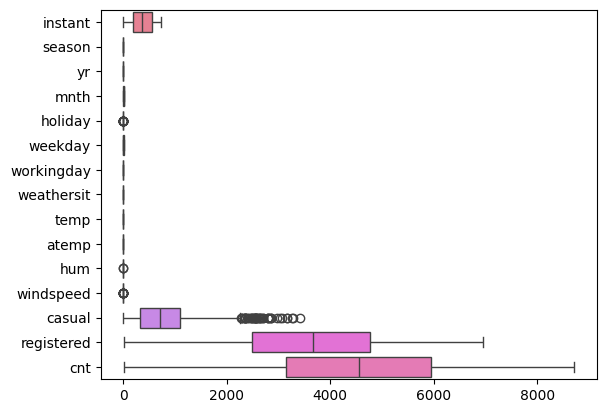

In [9]:
#mengecek outlier menggunakan boxplot
sns.boxplot(data=day_df, orient='h')
plt.show()

Terdapat banyak sekali outliers dari data diatas

In [10]:
#mengecek parameter statistik
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [11]:
#mengecek parameter statistik
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

- menurut saya harus me eliminasi kolom instant dikarenakan tidak ada keterkaitan nya
- harus me eliminasi kolom working day karena sudah ada kolom weekdays
- mengganti tipe data yang tidak sesuai
- mengkonversi nama nama yang membingungkan atau sulit dipahami
- membuat colomn baru untuk mengelompokan weekday or weekend
- menghitung jumlah kelembapan
- mendefinisikan temperature


Drop data yang tidak dibutuhkan

In [12]:
#menghapus kolom yang tidak digunakan
day_df.drop(['workingday'], axis = 1, inplace= True)
hour_df.drop(['workingday'], axis = 1, inplace= True)

In [13]:
#mengganti tipe data dteday yang sebelum nya object menjadi datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [14]:
#mengganti tipe data int menjadi kategori
columns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']
for column in columns:
    hour_df[column] = day_df[column].astype('category')
    day_df[column] = day_df[column].astype('category')

In [15]:
#mengkoversi nama kolom yang ada di dataset hour_df
hour_df.rename(columns={
    'yr': 'year',
    'hr': 'hour',
    'weekday': 'one_day_of_week',
    'mnth': 'month',
    'weathersit': 'weather_condition',
    'windspeed': 'wind_speed',
    'hum': 'humidity',
    'casual': 'non_member',
    'registered': 'member',
    'cnt': 'count_ttl'
}, inplace=True)

In [16]:
#menkonversi nama kolom yang ada di dataset day_df
day_df.rename(columns={
    'yr': 'year',
    'mnth': 'month',
    'weekday': 'one_day_of_week',
    'weathersit': 'weather_condition',
    'windspeed': 'wind_speed',
    'hum': 'humidity',
    'casual': 'non_member',
    'registered': 'member',
    'cnt': 'count_ttl'
}, inplace=True)

In [17]:
#Mengganti Bulan yang tadinya hanya angka menjadi Nama bulan dikarenakan akan mempermudah saat analysis data
day_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('January','February','March','April','May','June','July','August','September','October','November','December'), inplace=True)
hour_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12), ('January','February','March','April','May','June','July','August','September','October','November','December'), inplace=True)

#mengganti nama tahun
day_df.year.replace((0,1), ('2011','2012'), inplace=True)
hour_df.year.replace((0,1), ('2011','2012'), inplace=True)

#mengganti nama musim yang tadinya angka menjadi nama musim
day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
hour_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

#mengganti nama hari yang tadinya angka menjadi nama hari
day_df.one_day_of_week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
hour_df.one_day_of_week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

#mengganti nama kondisi cuaca yang tadinya angka menjadi jenis kondisi cuaca
day_df.weather_condition.replace((1,2,3,4), ('Clear','Mist','Light Snow','Heavy Rain'), inplace=True)
hour_df.weather_condition.replace((1,2,3,4), ('Clear','Mist','Light Snow','Heavy Rain'), inplace=True)


<ipython-input-17-e19964d7d979>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('January','February','March','April','May','June','July','August','September','October','November','December'), inplace=True)
<ipython-input-17-e19964d7d979>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_

In [18]:
#menghitung jumlah kelembapan
day_df['humidity'] = day_df['humidity']*100
hour_df['humidity'] = hour_df['humidity']*100

In [19]:
#mendeskripsikan atau mengelompokan kondisi kelembapan
def classify_humidity(humidity):
  if humidity > 65 :
    return "terlalu lembab"
  elif humidity >= 32 and humidity <= 65:
    return "lembab"
  else:
    return "Kering"
day_df['humidity_'] = day_df['humidity'].apply(classify_humidity)
hour_df['humidity'] = hour_df['humidity'].apply(classify_humidity)

In [20]:
#membuat colomn baru
one_day_of_week =['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
def get_category_days(one_day_of_week):
    if one_day_of_week in ["Monday", "Tuesday", "Wednesday" , "Thursday" , "Friday"]:
        return "weekday"
    else:
        return "weekend"
day_df['category_days'] = day_df['one_day_of_week'].apply(get_category_days)
hour_df['category_days'] = hour_df['one_day_of_week'].apply(get_category_days)

In [21]:
#mendeskripsikan temperatur suhu untuk mempermudah analysis
def classify_temp(temp):
  if temp > 33 :
    return "terlalu panas"
  elif temp >= 22 and temp <= 33:
    return "ideal"
  else:
    return "dingin"

## Exploratory Data Analysis (EDA)

### Explore Data day_df

In [22]:
#mengecek parameter statistik
day_df.describe(include="all")

,instant,dteday,season,year,month,holiday,one_day_of_week,weather_condition,temp,atemp,humidity,wind_speed,non_member,member,count_ttl,humidity_,category_days
count,731.000000,731,731,731,731,731.0,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731
unique,NaN,NaN,4,2,12,2.0,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2
top,NaN,NaN,Fall,2012,January,0.0,Sunday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lembab,weekday
freq,NaN,NaN,188,366,62,710.0,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,394,521
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,62.789406,0.190486,848.176471,3656.172367,4504.348837,NaN,NaN
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN,NaN
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,52.000000,0.134950,315.500000,2497.000000,3152.000000,NaN,NaN
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,62.666700,0.180975,713.000000,3662.000000,4548.000000,NaN,NaN
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,73.020850,0.233214,1096.000000,4776.500000,5956.000000,NaN,NaN
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,97.250000,0.507463,3410.000000,6946.000000,8714.000000,NaN,NaN


In [23]:
#melihat data terbanyak disetiap bulan dan tahun
peak_sales = day_df.groupby(['year', 'month'])['count_ttl'].max()
peak_sales

<ipython-input-23-2a492b5f3196>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  peak_sales = day_df.groupby(['year', 'month'])['count_ttl'].max()


year  month    
2011  January      1985
      February     2927
      March        3239
      April        5312
      May          5805
      June         5515
      July         6043
      August       5895
      September    5423
      October      5511
      November     4486
      December     3940
2012  January      4521
      February     5062
      March        8362
      April        7460
      May          8294
      June         8120
      July         8173
      August       7865
      September    8714
      October      8156
      November     6852
      December     6606
Name: count_ttl, dtype: int64

Jika dilihat diatas data di tahun 2011 paling banyak jumlah penyewaan nya di angka 6043 dan di tahun 2012 puncak paling tinggi berada di bulan september dengan angka 8714

In [24]:
day_df.groupby('season')['count_ttl'].mean().sort_values(ascending=False)

<ipython-input-24-7d7be80e0580>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby('season')['count_ttl'].mean().sort_values(ascending=False)


,count_ttl
season,
Fall,5644.303191
Summer,4992.331522
Winter,4728.162921
Spring,2604.132597


dari data diatas bisa dilihat bahwa season Fall paling banyak diminati untuk merental sepeda

In [25]:
day_df.groupby(by="year").agg({"member": ["sum"], "non_member": ["sum"]})

,member,non_member
,sum,sum
year,,
2011,995851,247252
2012,1676811,372765


Jika kita lihat dari data diatas bahwa masyarakat yang menyewa sepeda ditahun 2011 yang mempunyai member lebih sedikit dibandingkan yang tidak memiliki member
dan di tahun 2012 juga pun sama

Explore Data hour_df

In [26]:
hour_df.describe(include="all")

,instant,dteday,season,year,month,hour,holiday,one_day_of_week,weather_condition,temp,atemp,humidity,wind_speed,non_member,member,count_ttl,category_days
count,17379.0000,17379,731,17379,731,17379.000000,731.0,731,731,17379.000000,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,731
unique,NaN,NaN,4,2,12,NaN,2.0,7,3,NaN,NaN,3,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Fall,2012,January,NaN,0.0,Sunday,Clear,NaN,NaN,lembab,NaN,NaN,NaN,NaN,weekday
freq,NaN,NaN,188,8734,62,NaN,710.0,105,463,NaN,NaN,8518,NaN,NaN,NaN,NaN,521
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,NaN,0.190098,35.676218,153.786869,189.463088,NaN
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,NaN,0.000000,0.000000,0.000000,1.000000,NaN
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,NaN,0.104500,4.000000,34.000000,40.000000,NaN
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,0.500000,0.484800,NaN,0.194000,17.000000,115.000000,142.000000,NaN
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,0.660000,0.621200,NaN,0.253700,48.000000,220.000000,281.000000,NaN
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,0.850700,367.000000,886.000000,977.000000,NaN


## Visualization & Explanatory Analysis

### Pertanyaan 1:Kondisi cuaca seperti apa yang paling mendorong pelanggan untuk menyewa sepeda?

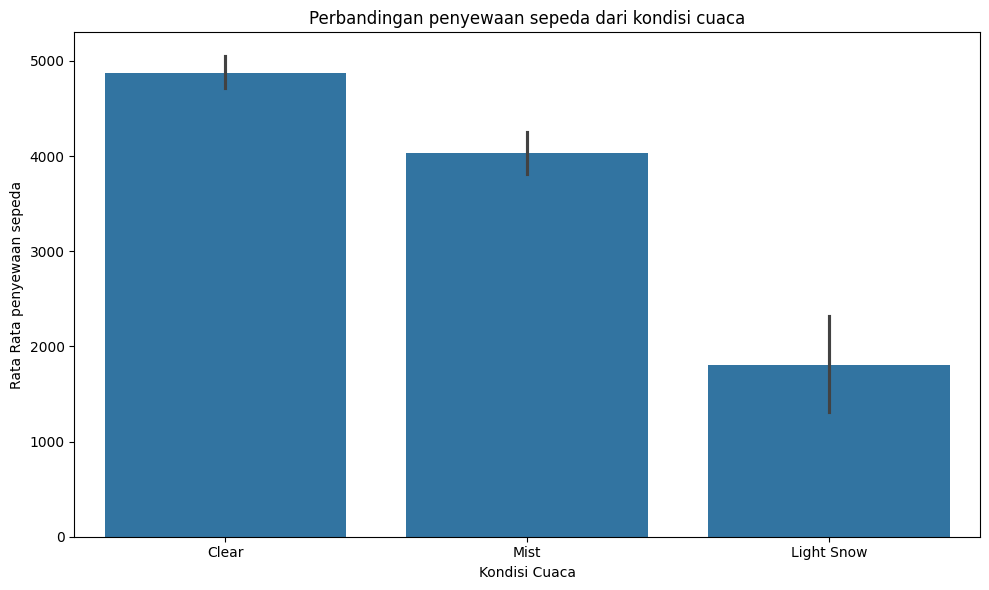

In [27]:
#membuat ukuran frame menjadi 1000x600
plt.figure(figsize=(10, 6))

#membuat barplot
sns.barplot(x='weather_condition', y='count_ttl', data=day_df)

#mengatur judul
plt.title('Perbandingan penyewaan sepeda dari kondisi cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata Rata penyewaan sepeda')

#meng adjust layout
plt.tight_layout()

#menampilkan plot
plt.show()

### Pertanyaan 2:Musim apakah yang menjadi puncak penyewaan sepeda?

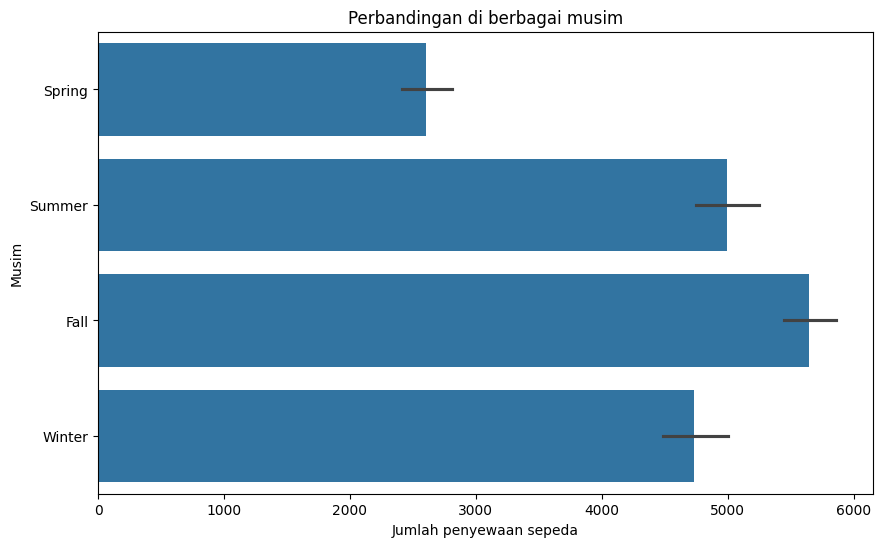

In [28]:
#mengatur ukuran tampilan menjadi 1000x600
plt.figure(figsize=(10, 6))

#membuat barchart untuk menampilkan perbandingan penyewaan sepeda di setiap musim
sns.barplot(x='count_ttl', y='season', data=day_df, orient='h')

#mengatur judul
plt.title('Perbandingan di berbagai musim')
plt.xlabel('Jumlah penyewaan sepeda')
plt.ylabel('Musim')

#menampilkan barchart
plt.show()

### Pertanyaan 3: Hari apa dalam seminggu puncak penyewaan sepeda terjadi?

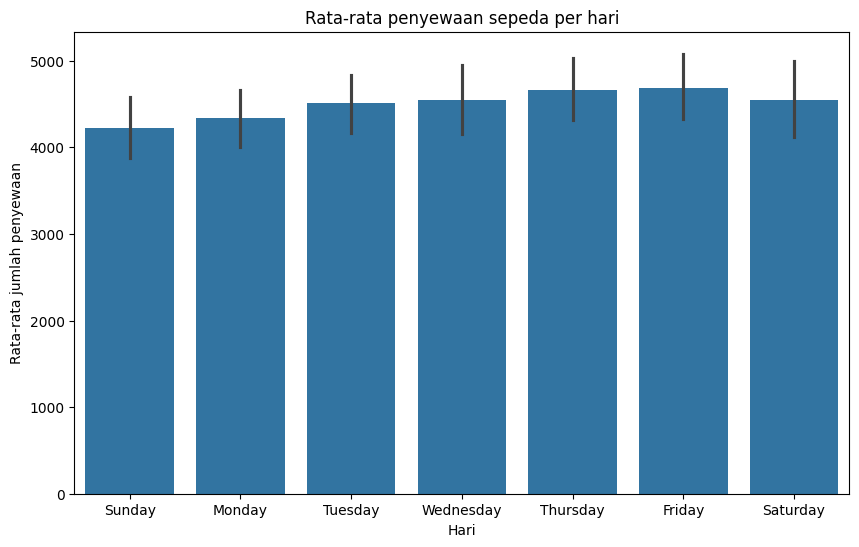

In [29]:
#membuat ukuran tampilan menjadi 1000x600
plt.figure(figsize=(10, 6))

#membuat barplot
sns.barplot(x='one_day_of_week', y='count_ttl', data=day_df)

#membuat judul
plt.title('Rata-rata penyewaan sepeda per hari')
plt.xlabel('Hari')
plt.ylabel('Rata-rata jumlah penyewaan')

#menampilkan barchart
plt.show()

### Pertanyaan 4: Bagaimana performa penyewaan sepeda di tahun terakhir?

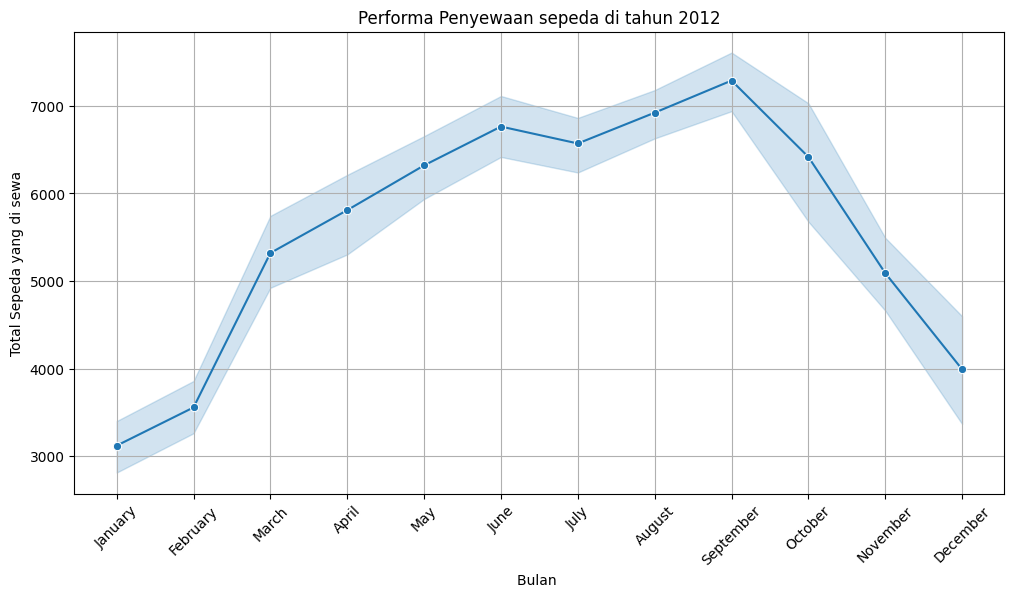

In [30]:
# Membuat lineplot untuk menampilkan data penyewaan sepeda di tahun 2012
plt.figure(figsize=(12, 6))

# membe
sns.lineplot(x='month', y='count_ttl', data=day_df[day_df['year'] == '2012'], marker='o')
plt.title('Performa Penyewaan sepeda di tahun 2012')
plt.xlabel('Bulan ')
plt.ylabel('Total Sepeda yang di sewa')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Pertanyaan 5: Perbandingan Member dan Non-member disetiap tahun nya?

<Figure size 1000x600 with 0 Axes>

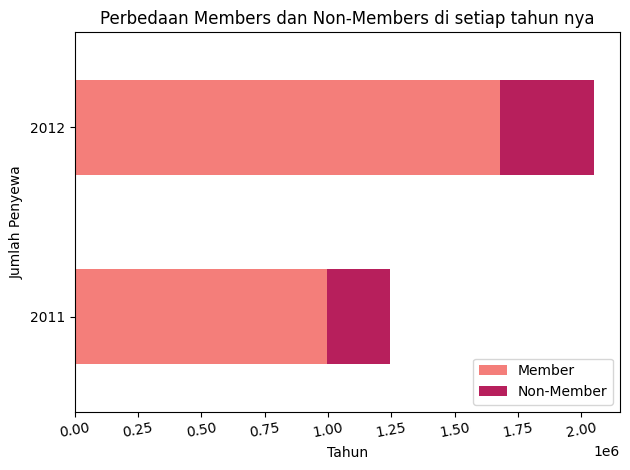

In [31]:
member_data = day_df.groupby('year').agg({'member': 'sum', 'non_member':'sum'})

plt.figure(figsize=(10, 6))
member_data[['member', 'non_member']].plot(kind='barh', align='center', stacked=True, color=['#f47e7a', '#b71f5c'])

plt.title('Perbedaan Members dan Non-Members di setiap tahun nya')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Penyewa')
plt.xticks(rotation=10)
plt.legend(['Member', 'Non-Member'])

plt.tight_layout()
plt.show()

## Conclusion

- Kondisi cuaca seperti apa yang paling mendorong pelanggan untuk menyewa sepeda?
- Musim apakah yang menjadi puncak penyewaan sepeda?
- Hari apa dalam seminggu puncak penyewaan sepeda terjadi?
- Bagaimana performa penyewaan sepeda di tahun terakhir?
- Perbandingan Member dan Non-member disetiap tahun nya?

pertanyaan 1: pada gambar diatas bahwa terlihat penyewaan sepeda yang paling banyak dilakukan terapat di kondisi cuaca Clear dan diikut oleh Mist

pertanyaan 2: dari data yang kita analisis puncak penyewaan sepeda ada pada musim Fall

pertanyaan 3: untuk posisi puncak pada penyewaan sepeda berada di hari Jumat

pertanyaan 4: untuk performa di tahun 2012 bisa kita lihat didata puncak nya ada dibulan November dan posisi terendah ada di bulan January

pertanyaan 5: Untuk di tahun 2011 pengguna non-member unggul jauh dari pengguna yang terdaftar member, dan ditahun 2012 pengguna non-member juga sangat meningkat dibandingan pengguna yang terdaftar menjadi member

## Analisis Lanjutan (Opsional)

In [32]:
#membuat rfm analysis
rfm_date = (hour_df['dteday'])
rfm_df = hour_df.groupby(by='count_ttl').agg({
    "dteday": "max", #recency
    "instant": "count", #Frequency
    "count_ttl": "sum" #Monetary
})
#mengganti nama kolom
rfm_df.columns = [ "recency", "frequency", "monetary"]
print(rfm_df.head())

             recency  frequency  monetary
count_ttl                                
1         2012-12-31        158       158
2         2012-12-30        208       416
3         2012-12-31        224       672
4         2012-12-28        231       924
5         2012-12-28        260      1300


In [33]:
day_df.to_csv("day.csv", index=False)

In [34]:
hour_df.to_csv("hour.csv", index=False)